In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = pd.read_csv('train.csv')


__Data Understanding__

In [2]:
df.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
#Data Understanding
summary = df.describe(include='all')
print(summary)

                  ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count   6.746300e+04  67463.000000   67463.000000            67463.000000   
unique           NaN           NaN            NaN                     NaN   
top              NaN           NaN            NaN                     NaN   
freq             NaN           NaN            NaN                     NaN   
mean    2.562761e+07  16848.902776   15770.599114            14621.799323   
std     2.109155e+07   8367.865726    8150.992662             6785.345170   
min     1.297933e+06   1014.000000    1014.000000             1114.590204   
25%     6.570288e+06  10012.000000    9266.500000             9831.684984   
50%     1.791565e+07  16073.000000   13042.000000            12793.682170   
75%     4.271521e+07  22106.000000   21793.000000            17807.594120   
max     7.224578e+07  35000.000000   34999.000000            34999.746430   

                Term Batch Enrolled  Interest Rate  Grade Sub Grade  \
coun

In [4]:
df['Employment Duration'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

__DATA CLEANSING AND PRE-PROCESSING__

In [5]:
#check for missing data by rows and by columns
missing_by_columns = df.isnull().sum()
print("Missing data by columns:")
print(missing_by_columns)


Missing data by columns:
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type       

In [6]:
numericFeatures = list(df.select_dtypes(include='number').columns) #recolhe todos os atríbutos numéricos 'number'
categFeatures = list(set(df.columns) - set(numericFeatures)) #recolhe todos os categóricos ao retirar os númericos selcionados na linha a cima
 
#Goal Attribute
goalAttrib = 'Loan Status'
#verificação de valores unicos para cada coluna categorica
for col in categFeatures:
    print(f'\nCategorias em "{col}" são:\n {df[col].unique()}')
    print(f"\nContagem de valores em {col}:\n{df[col].value_counts()}")
    print('.' * 100)


Categorias em "Payment Plan" são:
 ['n']

Contagem de valores em Payment Plan:
n    67463
Name: Payment Plan, dtype: int64
....................................................................................................

Categorias em "Grade" são:
 ['B' 'C' 'F' 'A' 'G' 'E' 'D']

Contagem de valores em Grade:
C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64
....................................................................................................

Categorias em "Initial List Status" são:
 ['w' 'f']

Contagem de valores em Initial List Status:
w    36299
f    31164
Name: Initial List Status, dtype: int64
....................................................................................................

Categorias em "Employment Duration" são:
 ['MORTGAGE' 'RENT' 'OWN']

Contagem de valores em Employment Duration:
MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64
............

In [7]:
#check for duplicate
df.duplicated().sum()


0

In [8]:
# Get only the categorical columns
categorical_columns = df.select_dtypes(include='object')

# Use the 'describe()' method for categorical columns
categorical_columns.describe()



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


__Remove and fixing collumns__

__Data Visualization__

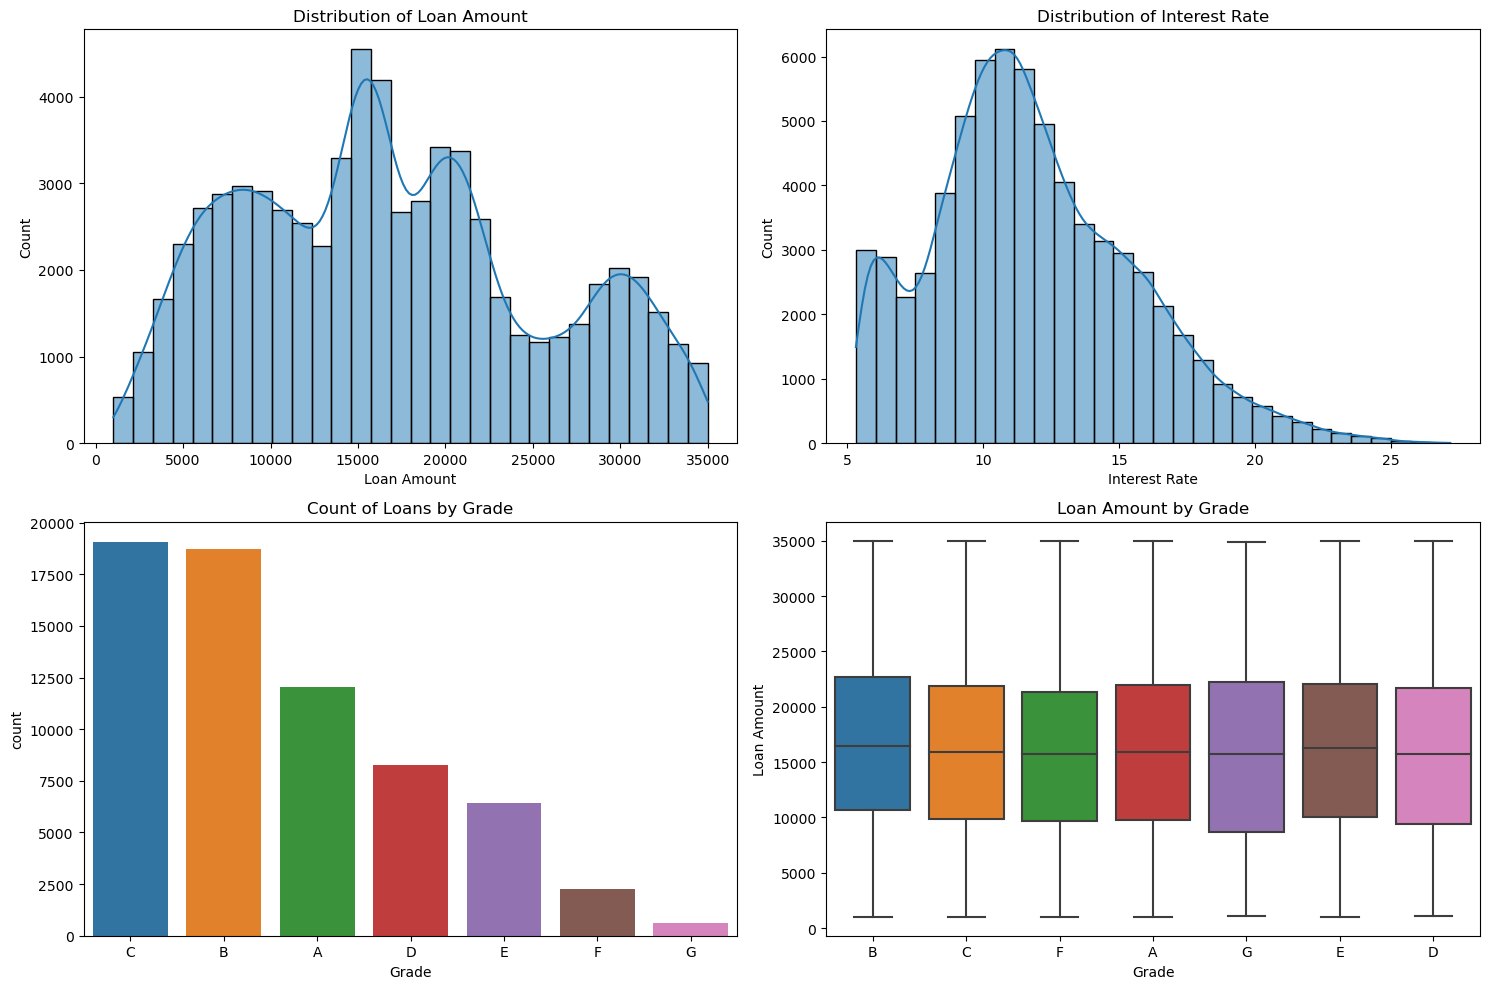

In [9]:
#Data visualization 
# Visualization of the distribution of some key numerical columns
plt.figure(figsize=(15, 10))

# Histogram for "Loan Amount"
plt.subplot(2, 2, 1)
sns.histplot(df['Loan Amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

# Histogram for "Interest Rate"
plt.subplot(2, 2, 2)
sns.histplot(df['Interest Rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')

# Bar plot for "Grade"
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Count of Loans by Grade')

# Box plot for "Loan Amount" by "Grade"
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Grade', y='Loan Amount')
plt.title('Loan Amount by Grade')

plt.tight_layout()
plt.show()

__Creation of Models Using Data Mining Algorithms:__

Model Selection:
Choose the machine learning algorithms (Logistic Regression, Decision Tree, Naive Bayes, KNN, SVM) for prediction.

__Model Building:__
Train and build models for each chosen algorithm on the training data.
Use libraries such as scikit-learn for model building.

__Model Evaluation:__
Evaluate each model's performance using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC, etc.).

__Hyperparameter Tuning:__
Optimize model hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

__Evaluation of the Models Created:__

__Model Comparison:__
Compare the performance of the different models.
Choose the best-performing model based on your evaluation metrics.

__Documentation and Reporting:__
Create a report or documentation summarizing the entire project, including findings and insights.
Explain the steps, methodologies, and model evaluation results.